<a href="https://colab.research.google.com/github/shafiq1805/ML-Regression--Bike-Sharing-Analysis/blob/main/Alma_better_ML_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Shafiq Abubacker


# **Project Summary -**

The goal of this project is to predict the demand for bike sharing services based on various factors such as weather conditions, time of day, and other relevant features. The project aims to develop a machine learning model that accurately forecasts the number of bike rentals for a given time period. This prediction can assist bike sharing service providers in optimizing bike availability, improving user experience, and managing resources efficiently.



# **GitHub Link -**

https://github.com/shafiq1805/ML-Regression--Bike-Sharing-Analysis/tree/main

# **Problem Statement**


The project utilizes the Seoul Bike Sharing Demand dataset, which includes historical data on bike rentals in Seoul. The dataset contains information on weather conditions, temperature, humidity, wind speed, and other temporal and environmental factors that may influence bike demand. Additionally, the dataset includes information on the number of bikes rented during specific time intervals.

The methodologies are as follows:
1. Data Preprocessing
2. Feature Selection
3. Model Selection
4. Training and Validation
5. Evaluation



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

#ML Libraries
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Dataset Loading

In [12]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/03 ML/SeoulBikeData.csv",encoding ='ISO-8859-1')

### Dataset First View

In [14]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [17]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [18]:
df.describe(include = "all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    8760
dtype: int64

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending = False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

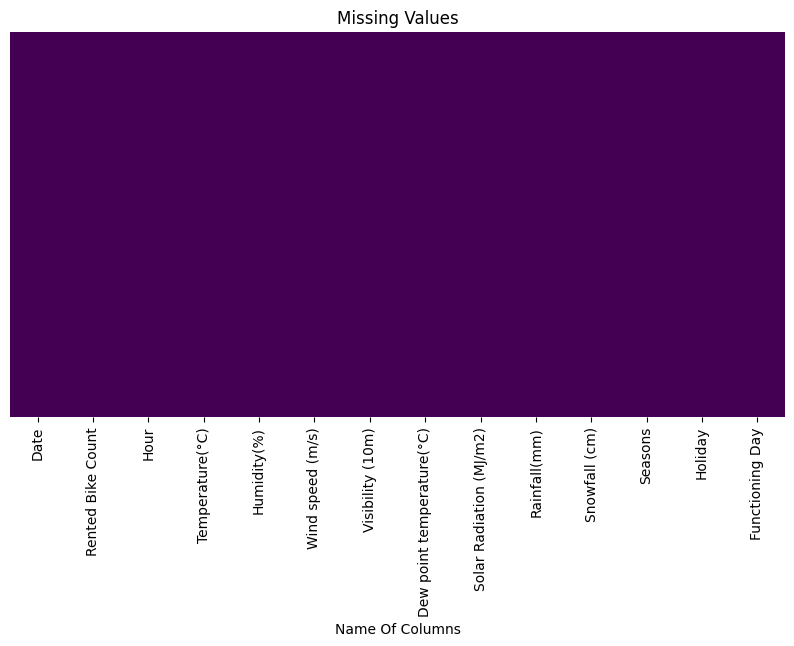

In [21]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Missing Values")

### What did you know about your dataset?

The dataset comprises 8,760 observations and 14 features, corresponding to the 24 hours in a day over 365 days in a year. This ensures each line in the dataset represents a unique hour within the specified time frame. Notably, there are no null values, and all entries are distinct, mitigating biases that duplicates might introduce, thereby facilitating unbiased downstream analysis. Furthermore, to enhance data consistency and facilitate temporal analysis, the "Date" feature, currently of object data type, should be converted to the datetime data type.








## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [23]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

**Date:** The date of the measurement.

**Hour:** The hour of the day (0-23) when the measurement was taken.

**Temperature:** The temperature of the day in degrees Celsius.

**Humidity:** The humidity measure as a percentage.

**Windspeed:** The windspeed in meters per second.

**Visibility:** The visibility measure in meters.

**Dew Point Temperature:** The dew point temperature measure in degrees Celsius.

**Solar Radiation:** The solar radiation measure in watts per square meter.

**Rainfall**: The rainfall measure in millimeters.

**Snowfall:** The snowfall measure in centimeters.

**Seasons:** The season of the year (1 = spring, 2 = summer, 3 = fall, 4 = winter).

**Holiday:** Whether the day is a holiday or not (1 = yes, 0 = no).

**Functional Day:** Whether the day is a functional day or not (1 = yes, 0 = no).


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].value_counts()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Date:
01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

Unique values for Rented Bike Count:
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

Unique values for Hour:
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

Unique values for Temperature(°C):
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64

Unique values for Hum

Date:

The dataset spans a period of 365 days from 01/12/2017 to 30/11/2018.
Each date has 24 unique observations, corresponding to the 24 hours in a day.
Rented Bike Count:

The majority of instances have non-zero bike counts, ranging up to 2096.
The distribution is right-skewed, with a higher frequency of lower bike counts.
Hour:

Each hour of the day (0 to 23) is represented by 365 observations, indicating a balanced distribution.
Temperature (°C):

Temperature values vary, with a range of 546 unique values.
The dataset includes both positive and negative temperatures.
Humidity (%):

Humidity values range from 10% to 97%, with 90 unique values.
Wind Speed (m/s):

Wind speed values vary from 0.5 to 7.3 m/s, with 65 unique values.
Visibility (10m):

Visibility values exhibit considerable variation, with 1789 unique values.
The majority of instances have a visibility of 2000 meters.
Dew Point Temperature (°C):

Dew point temperatures span a range of 556 unique values.
Solar Radiation (MJ/m2):

Solar radiation values range from 0.00 to 3.49 MJ/m2, with 345 unique values.
Rainfall (mm):

Rainfall values vary, with 61 unique values.
The majority of instances have zero rainfall.
Snowfall (cm):

Snowfall values range from 0.0 to 8.8 cm, with 62 unique values.
A significant portion of instances (8317) has no snowfall.
Seasons:

Four seasons (Spring, Summer, Autumn, Winter) are represented in the dataset, each with a roughly similar frequency.
Holiday:

The dataset includes instances both with and without holidays.
The majority of instances (8328) are marked as "No Holiday."
Functioning Day:

Most instances (8465) are marked as "Yes" for functioning days, with only 295 instances marked as "No."
These observations provide an initial understanding of the dataset's characteristics, which is crucial for further analysis and model development. Depending on the specific goals, additional exploratory data analysis and feature engineering may be performed before training machine learning models.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [26]:
#Feature engineering

# Splitting day of week, month, and year into three columns
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year.astype("object")

# Dropping the original 'Date' column
df.drop(columns=['Date'], inplace=True)


In [27]:
# convert Hour column integer to Categorical
df['Hour']=df['Hour'].astype('object')


# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

numeric_features.head()

#Converting days of weeks in Two variable from Monday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

# droping the days of week column from df and from categorical feature
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays


### What all manipulations have you done and insights you found?

**Numerical Features**:

'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', and others.

**Categorical Features:**

'Hour_0' to 'Hour_23' for each hour of the day.

'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', and 'Seasons_Autumn' for different seasons.

'Holiday_No Holiday' indicating whether it's a holiday or not.

'Functioning Day_Yes' indicating whether it's a functioning day or not.

**Temporal Features:**

'DayOfWeek' with values like 'Monday', 'Tuesday', etc.

'Month' representing the month.

'Quarter' indicating the quarter of the year.

'Year' representing the year.

**Insights:**

The dataset now contains a total of 42 columns, each representing different aspects of the data.

The one-hot encoding has expanded the categorical variables into binary columns, making them suitable for machine learning models.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Scatter Plot

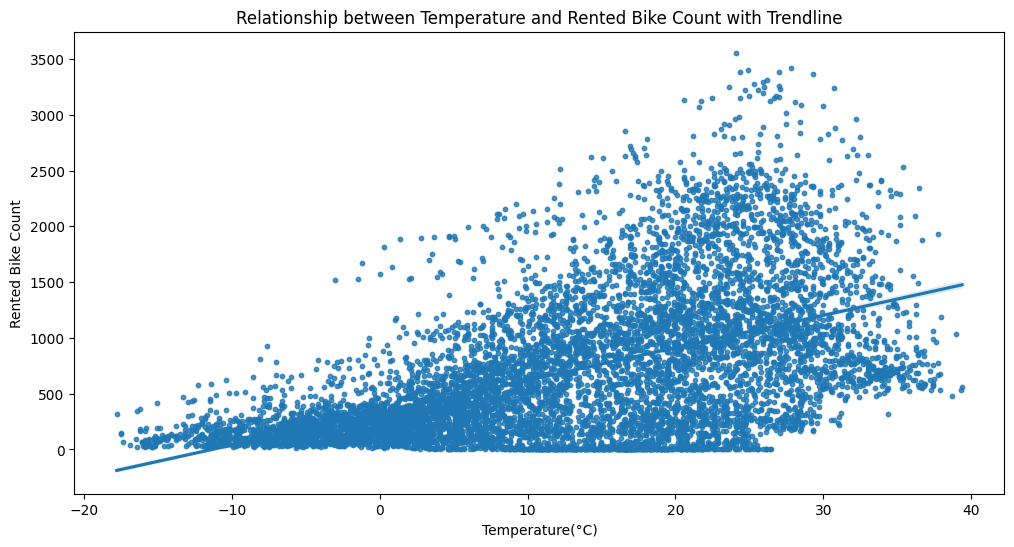

In [28]:
# Chart - 1 visualization code

# Relationship between Temperature and Rented Bike Count
plt.figure(figsize=(12, 6))
sns.regplot(x='Temperature(°C)', y='Rented Bike Count', data=df, scatter_kws={'s': 10})
plt.title('Relationship between Temperature and Rented Bike Count with Trendline')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the relationship between temperature and rented bike count because it is effective in displaying individual data points and identifying potential patterns or trends.

Scatter plots are particularly useful for exploring how two continuous variables may be related.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a general positive correlation between temperature and rented bike count. As temperature increases, there seems to be an upward trend in the number of rented bikes. This implies that people are more likely to rent bikes when the weather is warmer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Optimal Operating Conditions:** Knowing that bike rentals increase with higher temperatures, the bike-sharing service could optimize operations, such as increasing the number of available bikes or adjusting staffing levels during warmer days to meet higher demand.

**Marketing and Promotions:** The information can be used in marketing strategies to promote bike rentals during favorable weather conditions. Special promotions or discounts could be offered during periods of ideal temperatures to attract more users.

**Resource Allocation:** Understanding the impact of temperature on bike rentals helps in better resource allocation, such as maintenance scheduling, to ensure that bikes are in good condition during peak demand periods.

#### Chart - 2

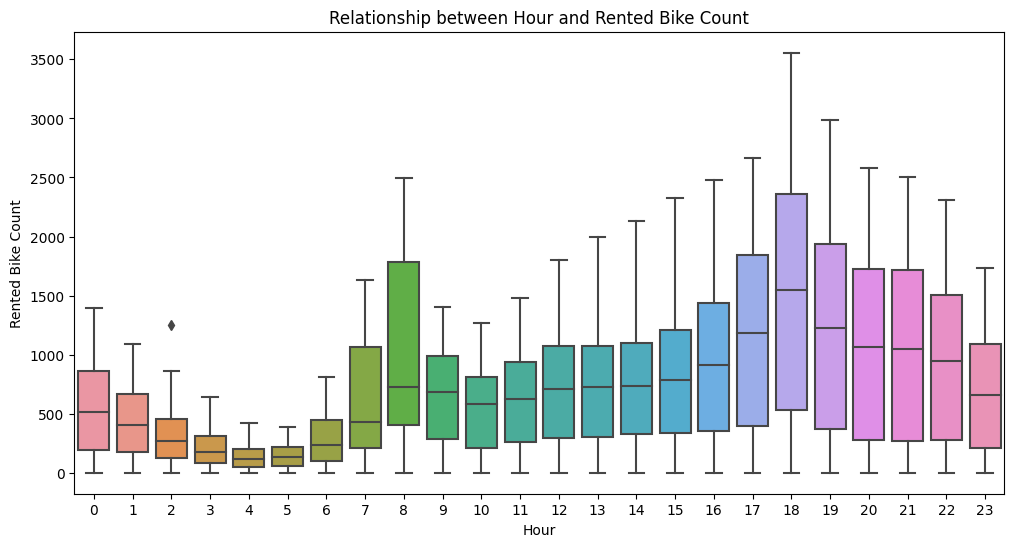

In [29]:
# Chart - 2 visualization code

# Relationship between Hour and Rented Bike Count

plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Relationship between Hour and Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot effectively visualizes the distribution of rented bike counts across different hours of the day. It reveals patterns and trends that might not be apparent from raw data alone.

##### 2. What is/are the insight(s) found from the chart?

**Peak Hours:** Bike rentals are highest during morning rush hours (around 8-9 AM) and evening rush hours (around 5-6 PM), suggesting common commuting patterns.


**Low Usage Hours:** Rentals are lowest during late-night and early morning hours (1-5 AM), indicating reduced demand during those times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. By understanding peak and low usage hours, bike-sharing companies can optimize their distribution strategies. They can rebalance bikes by moving them from low-demand stations to high-demand stations during peak hours, reducing shortages and improving customer satisfaction.

2. Understanding hourly demand fluctuations allows for implementing dynamic pricing strategies. Rates can be adjusted based on demand, charging higher prices during peak hours and offering discounts during low-demand hours can increase revenue during peak times while encouraging usage during off-peak hours, ultimately leading to better resource utilization and improved market penetration.

Although, Implementing strict pricing or distribution changes based solely on hourly patterns might alienate certain users or create inconvenience. A nuanced approach with flexibility and consideration for user feedback is crucial to avoid negative impacts.

#### Chart - 3

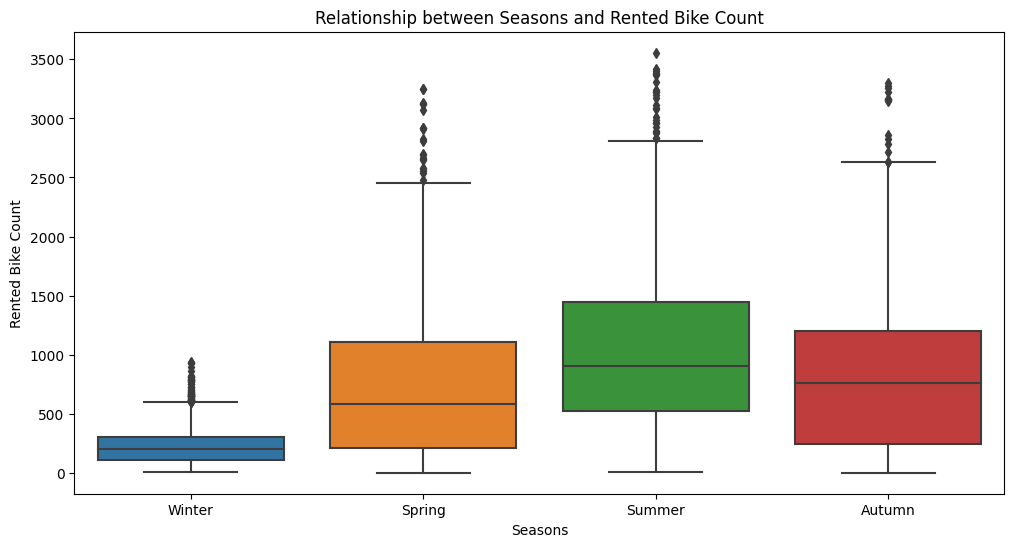

In [30]:
# Chart - 3 visualization code

# Relationship between Seasons and Rented Bike Count

plt.figure(figsize=(12, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Relationship between Seasons and Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots effectively display the distribution of rented bike counts within each season, including medians, quartiles, ranges, and potential outliers. This allows for understanding both central tendencies and variability, providing a more comprehensive view than simple averages.

##### 2. What is/are the insight(s) found from the chart?



**Highest Demand:** Autumn (fall) has the highest median rented bike count, followed by summer. This suggests that favorable weather conditions and outdoor activities during these seasons likely drive increased usage.

**Lowest Demand:** Winter has the lowest median count, indicating a decrease in demand potentially due to colder temperatures, shorter days, and less conducive weather for cycling.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.  Understanding seasonal trends can help anticipate bike rental demand throughout the year, enabling better planning for bike availability, maintenance, and resource allocation.

2.  By anticipating seasonal fluctuations, bike-sharing companies can adjust their inventory levels to ensure sufficient bikes are available during peak seasons and avoid oversupply during low seasons.

3. Rigidly applying the same pricing, marketing, or operational strategies across all seasons might alienate certain user segments or create inconvenience. Understanding user preferences and adapting strategies based on seasonal behavior can improve user satisfaction and boost ridership.

#### Chart - 4

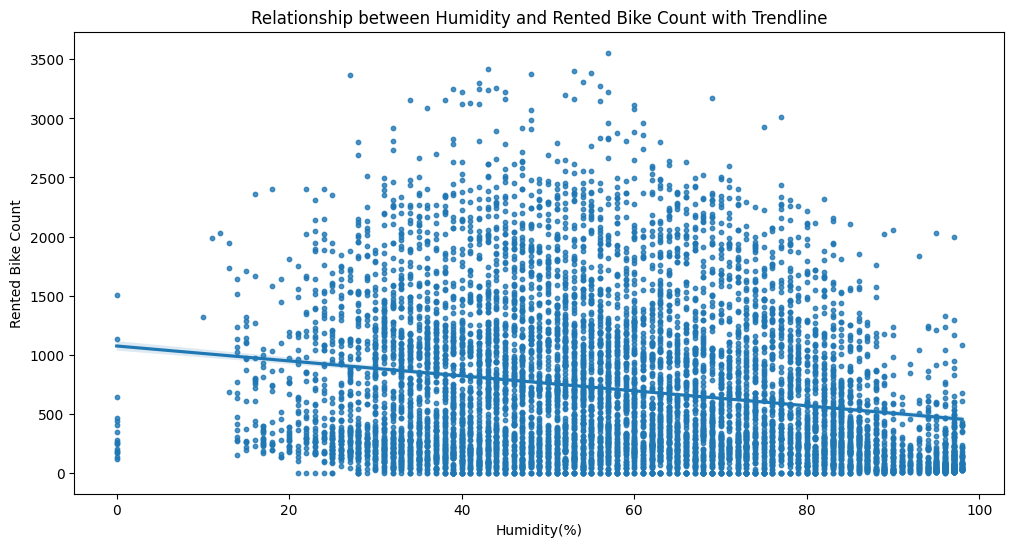

In [31]:
# Chart - 4 visualization code

# Relationship between Humidity and Rented Bike Count
plt.figure(figsize=(12, 6))
sns.regplot(x='Humidity(%)', y='Rented Bike Count', data=df, scatter_kws={'s': 10})
plt.title('Relationship between Humidity and Rented Bike Count with Trendline')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots can reveal nonlinear relationships (e.g., quadratic, exponential) that might be missed by other charts like box plots or bar charts.

##### 2. What is/are the insight(s) found from the chart?

**Negative Correlation:** The scatter plot indicates a general negative correlation between humidity and rented bike count. As humidity increases, the number of rented bikes tends to decrease. However, the relationship is not perfectly linear, suggesting other factors also influence rental demand.

**Nonlinear Pattern:** The pattern appears slightly curved, suggesting a possible nonlinear relationship. This could mean that the impact of humidity on rentals might vary at different levels of humidity.

**Variability:**There's considerable variability in the data points, indicating that humidity is not the sole predictor of bike rentals. Other factors like temperature, time of day, day of the week, and individual preferences likely contribute to rental decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Demand Forecasting:** Understanding the impact of humidity on bike rentals can improve demand forecasting models, leading to better resource allocation and reduced shortages.

**Targeted Marketing:** Companies can create marketing campaigns that emphasize the benefits of cycling in drier conditions or offer incentives during low-humidity periods.

**Inventory Management:** Anticipating lower demand during high-humidity periods can help manage inventory levels, potentially reducing maintenance costs and oversupply.

**Dynamic Pricing:** Implementing dynamic pricing strategies that adjust rental rates based on humidity levels could potentially increase revenue during drier periods and encourage usage during less popular times.

**Customer Experience:** Providing information about humidity levels and potential comfort levels for cycling can enhance customer experience and enable users to make informed decisions about their rentals.

#### Chart - 5

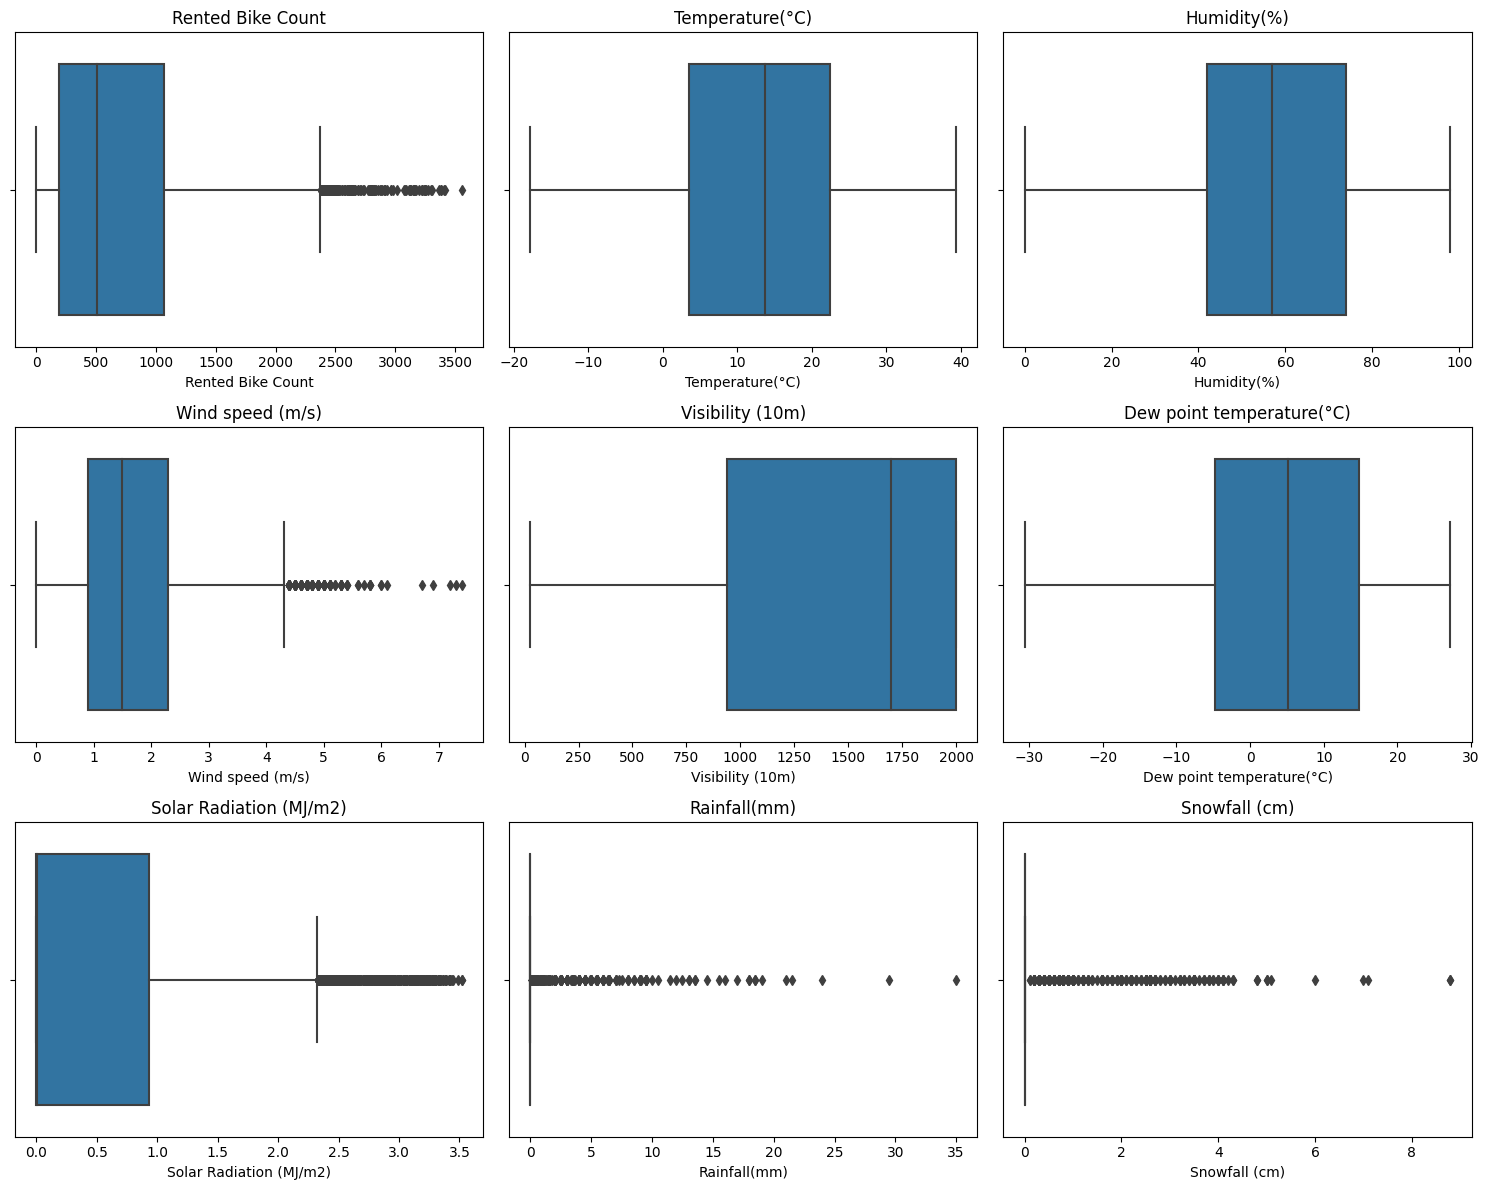

In [32]:
#To check Outliers

plt.figure(figsize=(15, 12))

for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 The boxplots is used to show the median, quartiles, and outliers for each variable.

##### 2. What is/are the insight(s) found from the chart?

1. The distribution of rented bike count is skewed to the right, which means that there are more data points on the high end of the range.

2. The distribution of wind speed has two peaks, which means that there are two groups of data points that are more common than others.

3. the range of temperature is from -20°C to 30°C

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above Boxplot does not show a lot of outliers, but there are a few data points that fall outside of the boxplots. These outliers could be due to a number of factors, such as measurement errors or unusual events.


#### Chart - 6

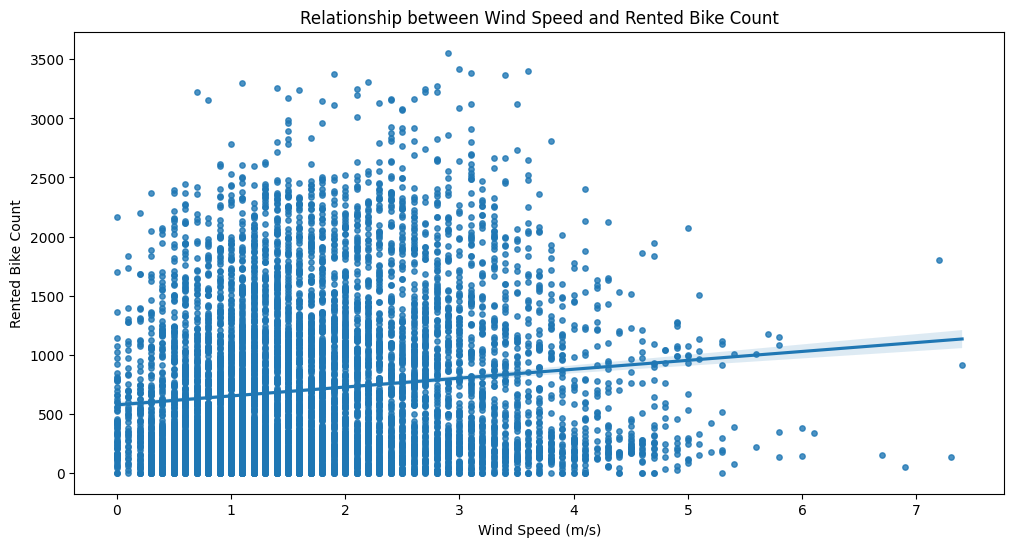

In [33]:
# Chart - 6 visualization code

# Relationship between Wind speed and Rented Bike Count
plt.figure(figsize=(12, 6))
sns.regplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df, scatter_kws={'s': 15})
plt.title('Relationship between Wind Speed and Rented Bike Count')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplot with regrssion line is used to visualize the relationship between wind speed (m/s) and rented bike count.

##### 2. What is/are the insight(s) found from the chart?

An increasing trendline suggests a more pronounced positive association between wind speed and bike rentals.

As wind speed increases, the number of rented bikes would also tend to increase

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consider highlighting the benefits of cycling in windy conditions during specific seasons or for particular customer segments. This could attract new customers and boost rentals on windier days.

#### Chart - 7

<Figure size 1000x1000 with 0 Axes>

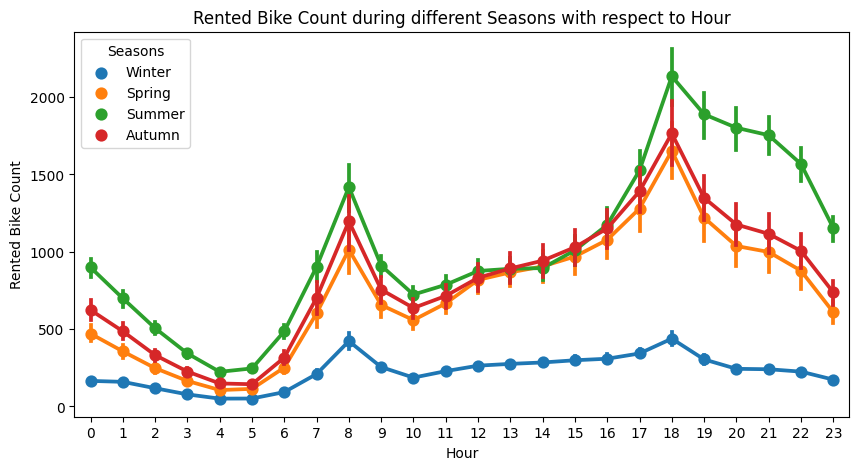

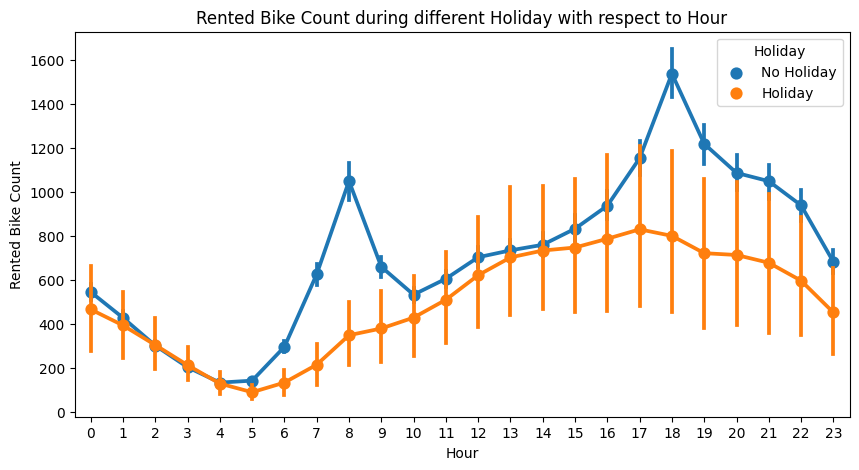

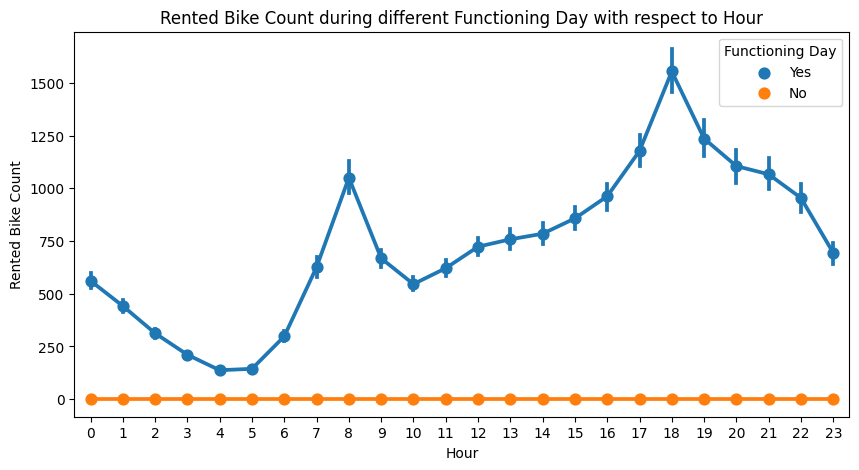

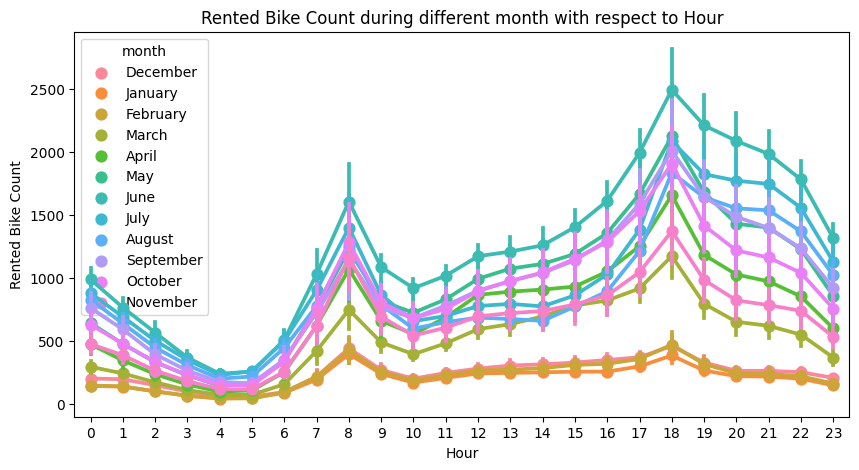

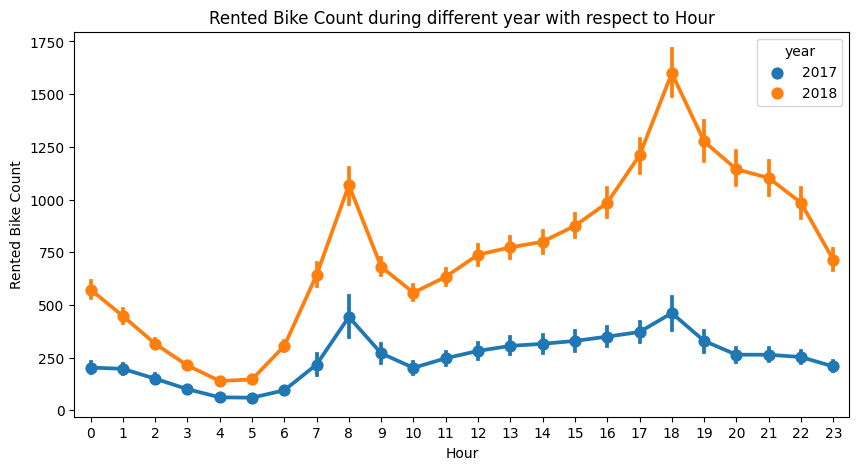

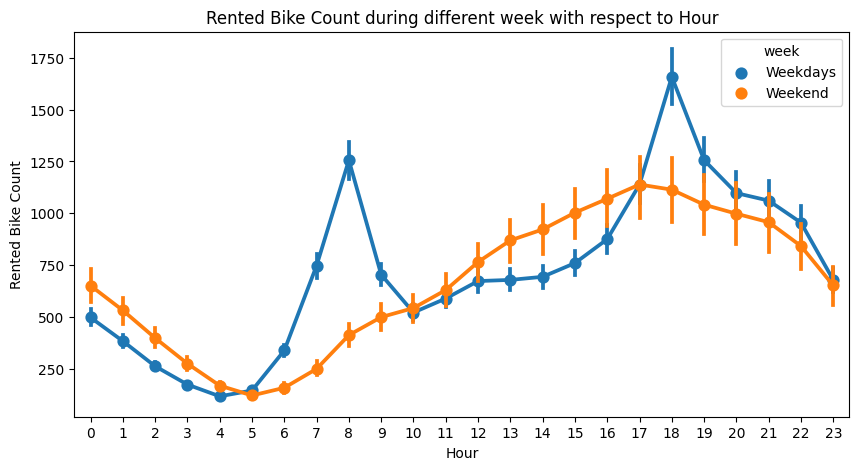

In [34]:
# Chart - 7 visualization code

plt.figure(figsize=(10, 10))
categorical_features = ['Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'week']

for i in categorical_features:
    if i == 'Hour':
        pass
    else:
        plt.figure(figsize=(10, 5))
        sns.pointplot(x='Hour', y='Rented Bike Count', hue=i, data=df)
        plt.title(f'Rented Bike Count during different {i} with respect to Hour')
        plt.show()


##### 1. Why did you pick the specific chart?

A point plot is suitable as it displays the mean Rented Bike Count at each hour, providing insights into the hourly demand pattern with respect to 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'week'.

##### 2. What is/are the insight(s) found from the chart?

**Season:**

The demand for rented bikes is notably lower during the winter season compared to other seasons.

**Holiday:**

The data suggests that bike demand is lower during holidays, potentially indicating a shift in usage patterns. Conversely, on non-holidays, the demand is higher, possibly due to commuting to work.

**Functioning Day:**

The absence of a Functioning Day corresponds to a lack of demand. It's essential for the service to operate on functioning days to meet user needs.

**Days of the Week:**

The analysis of days of the week reveals distinct patterns. Weekdays exhibit higher demand during office hours, while weekends experience increased demand in the afternoon.

**Month:**

Notably, the demand for rented bikes is lower in December, January, and February, aligning with the winter season. Cold weather likely contributes to reduced bike usage during these months.

**Year:**

The data indicates an increase in demand from 2017 to 2018. This could be attributed to increased awareness and adoption as the service became more established in subsequent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Optimized Operations:** Understanding the seasonal and monthly variations in bike demand allows for better operational planning. The business can allocate resources more efficiently, such as adjusting the number of available bikes and staff during peak hours or seasons.

**Marketing Strategies:** The insight into higher demand on non-holidays suggests the potential for targeted marketing strategies. Promotions and incentives during non-holidays could encourage more users to choose bike rentals, boosting revenue.

**Service Availability:** Recognizing the importance of functioning days highlights the need to ensure consistent service availability on those days. Consistency in service leads to increased user satisfaction and loyalty.

**User Engagement:** Tailoring marketing efforts and promotions based on the days of the week can enhance user engagement. For example, promotions for weekend rides or special weekday offers can attract more users.

**Yearly Growth:** The observed increase in demand from 2017 to 2018 indicates positive growth. The business can leverage this trend by focusing on expanding services, improving infrastructure, and enhancing user experience to sustain and accelerate growth.

**Potential Negative Impact:**

**Winter Season Challenge:** The lower demand during the winter season poses a challenge. The business may need to implement strategies to incentivize bike usage during colder months, such as introducing winter-specific promotions or services.

**Holiday Strategy:**While demand is lower during holidays, this insight can be viewed positively for resource optimization. However, it may also imply the need for specific marketing efforts or promotions to encourage bike rentals during holiday periods.

**Operational Costs:** The need for consistent service on functioning days is critical for positive user experience. However, it also means that operational costs must be maintained, which could impact profitability.

**Competition and Awareness:** The positive growth from 2017 to 2018 suggests increasing market awareness. However, it also implies a more competitive landscape. The business needs to stay innovative and customer-focused to stand out in a growing market.

#### Chart - 8

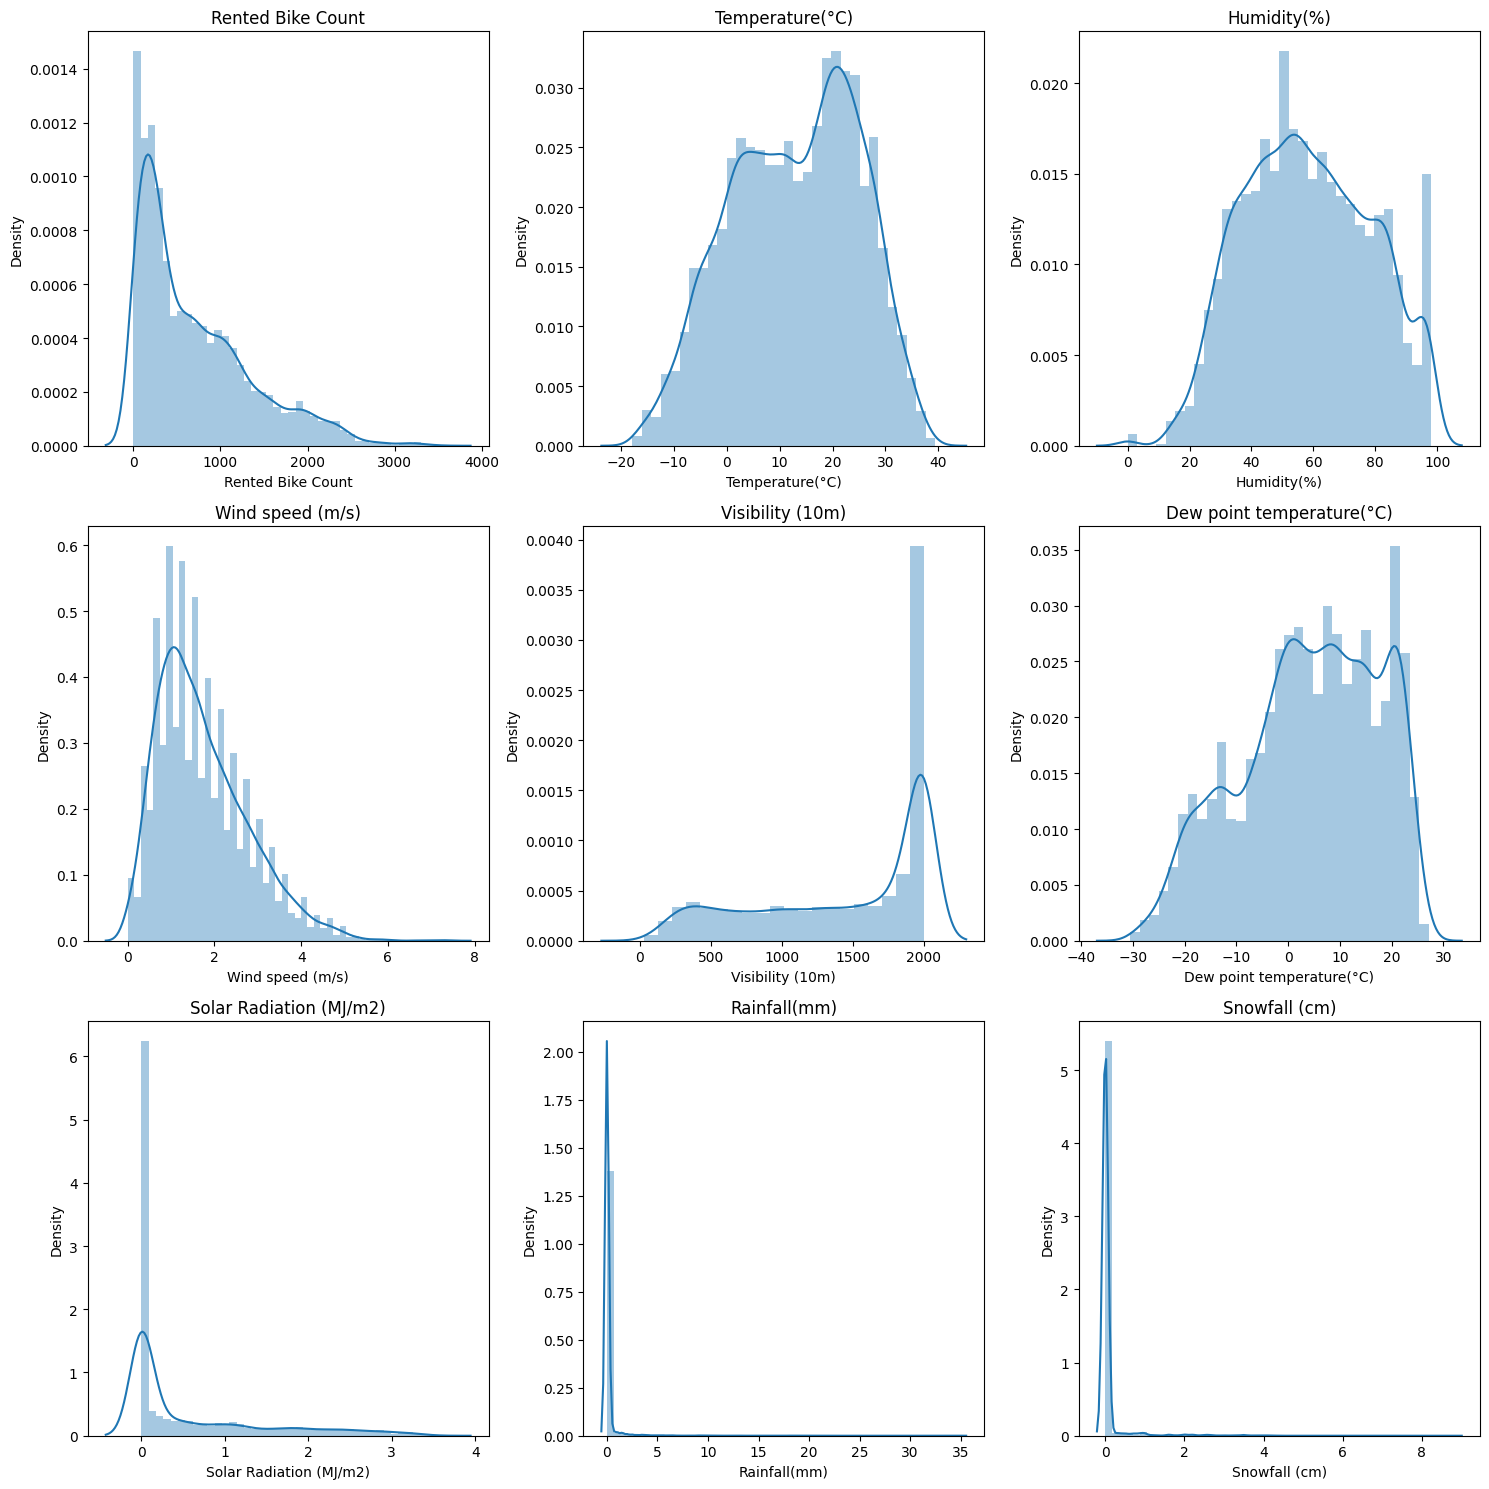

In [35]:
# Chart - 8 visualization code

# Assume numeric_features contains the numeric columns of our DataFrame

plt.figure(figsize=(15, 15))

for n, i in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, n)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

1. Subplots allow for a more compact presentation of multiple distributions in a single figure, avoiding clutter and improving visual clarity.

2. With subplots, it's convenient to compare the shapes, ranges, and skewness of distributions across various numerical features.

##### 2. What is/are the insight(s) found from the chart?

**Right-skewed columns:**

Rented Bike Count (Dependent variable)

Wind speed (m/s)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)

**Left-skewed columns:**

Visibility (10m)

Dew point temperature(°C)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Right-skewed Columns:**


Rented Bike Count (Dependent variable): Understanding the right-skewness in bike count distribution indicates that there are instances of high demand, which can be positive for the business. Insights into peak demand periods allow for effective resource allocation and operational planning.


**Wind speed (m/s):**

 High wind speed might discourage outdoor activities, including biking. Recognizing this can help the business anticipate and plan for potential drops in demand during windy conditions.


**Solar Radiation (MJ/m2):**

Positive skewness in solar radiation suggests that there are periods with higher sunlight, potentially corresponding to increased bike usage. This insight can be leveraged for targeted marketing during sunny days.


**Rainfall(mm) and Snowfall (cm):** The right-skewed nature of rainfall and snowfall implies that there are periods of minimal or no precipitation, which could be favorable for bike usage. Marketing promotions or incentives during such periods may positively impact demand.


**Negative Growth Considerations:**

**Left-skewed Columns:**
Visibility (10m): Left-skewness in visibility suggests that there are instances of reduced visibility, which may be associated with adverse weather conditions like fog. This could lead to safety concerns and potentially decrease bike usage during such periods, impacting business.

**Dew point temperature(°C):** Left-skewness in dew point temperature indicates a concentration of higher dew point temperatures. While not necessarily negative, understanding this pattern helps in recognizing conditions that may affect user comfort, potentially influencing bike usage.

#### Chart - 9

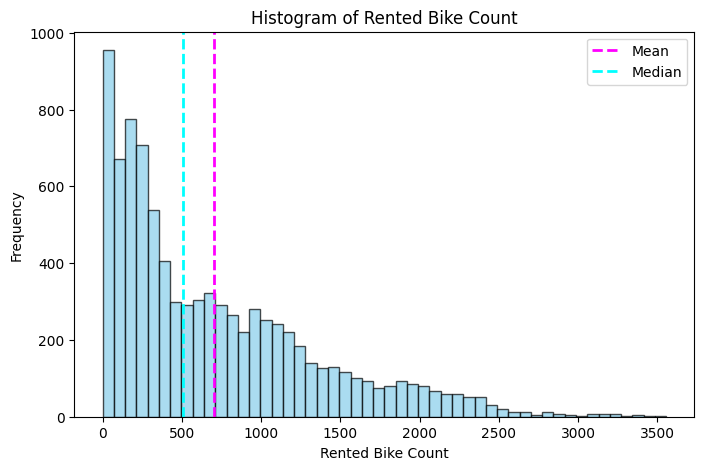

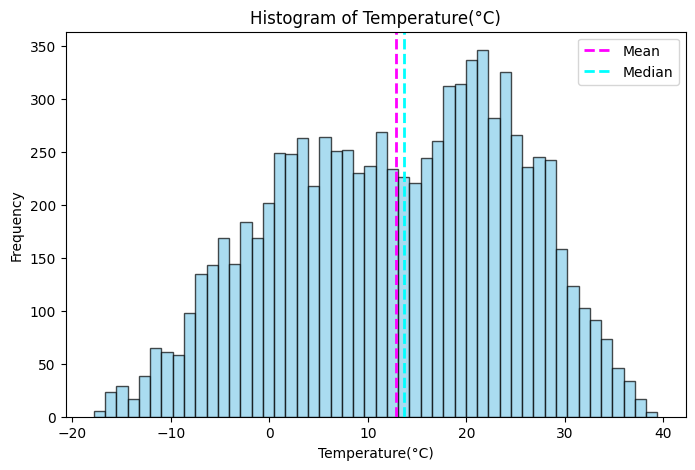

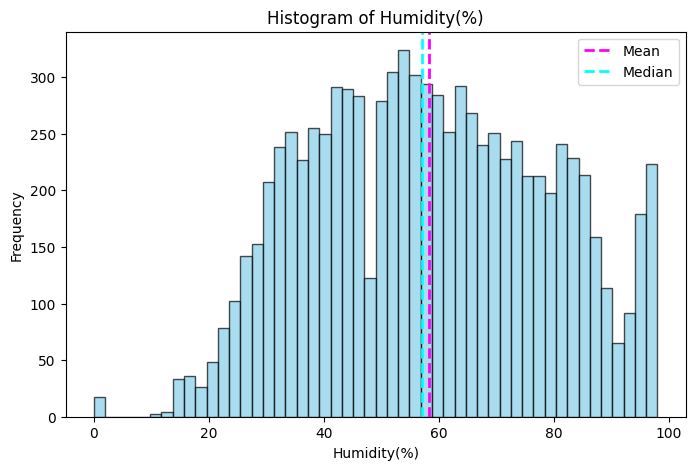

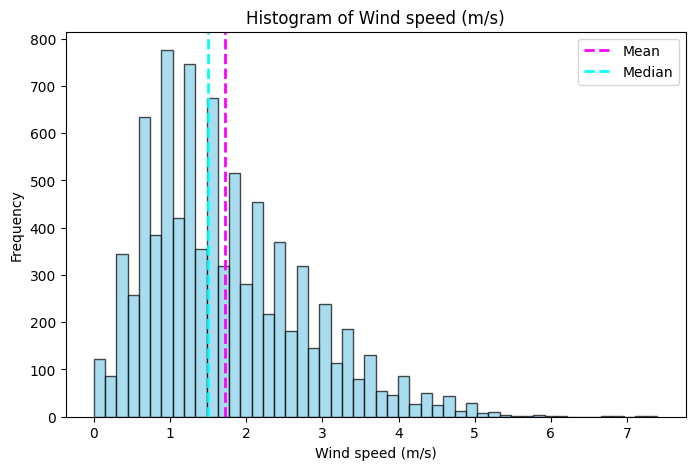

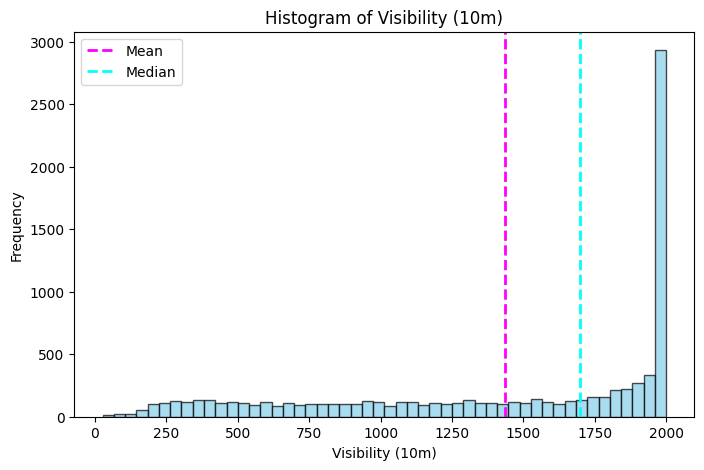

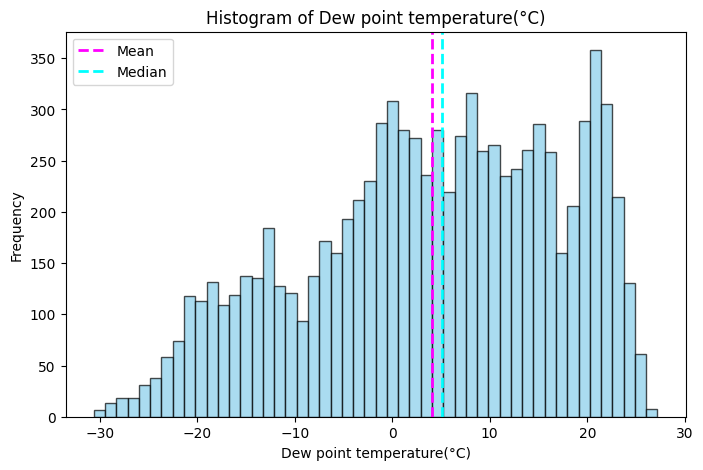

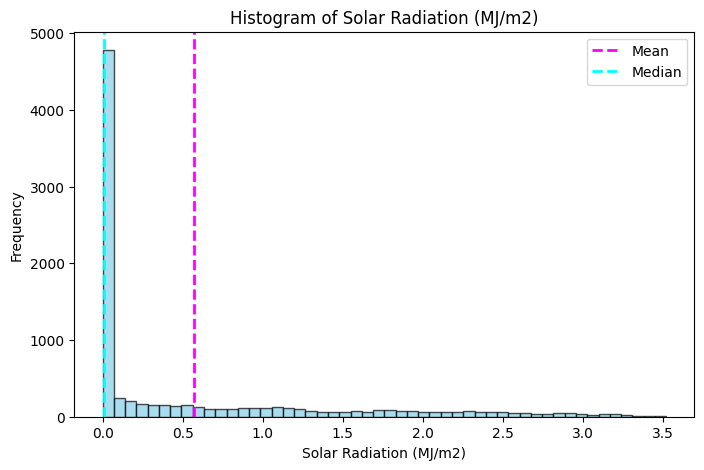

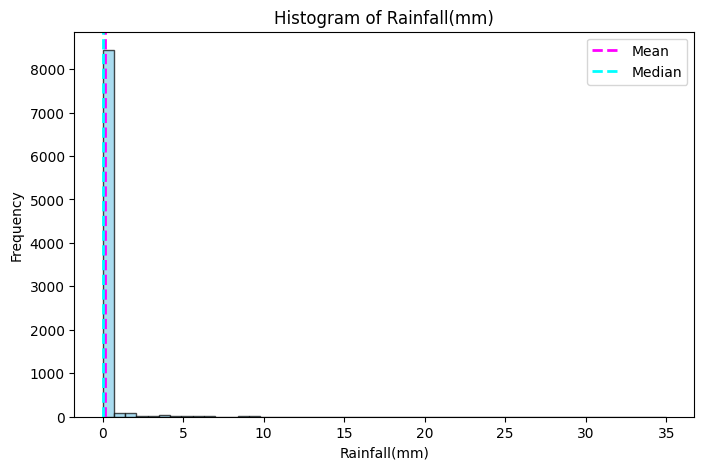

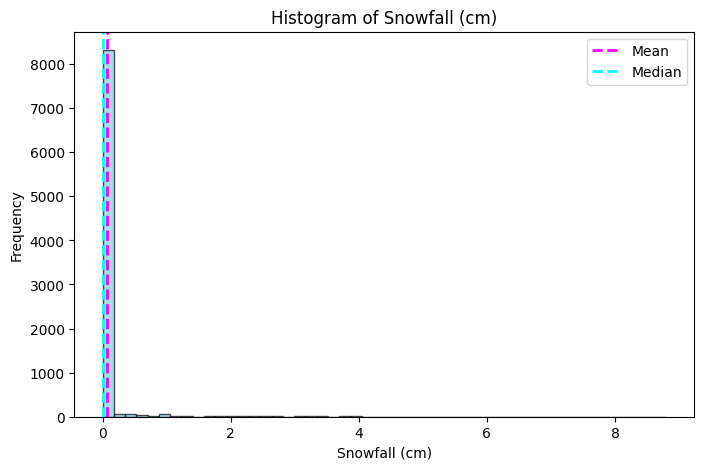

In [36]:
# Chart - 9 visualization code

for col in numeric_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')

    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

##### 1. Why did you pick the specific chart?

The mean and median lines in the histogram help visualize the central tendency of the data, allowing for a quick comparison between the two measures.S

##### 2. What is/are the insight(s) found from the chart?


The presented graph illustrates that the distribution of the Rented Bike Count exhibits a moderate right skewness. In the context of linear regression, a key assumption is that the dependent variable follows a normal distribution. Therefore, it becomes imperative to undertake operations that mitigate the skewness, aligning the distribution more closely with normality.

Further examination of the graph highlights a discernible distinction between the mean and median, affirming our expectation of skewedness. The divergence between mean and median is a characteristic often associated with skewed distributions, a phenomenon evident from the visual representation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Rented Bike Count:**

The histogram shows the distribution of rented bike counts, and the vertical lines represent the mean and median values.

**Temperature(°C):**

The distribution of temperatures is visualized, with mean and median lines for reference.

**Humidity(%):**

Histogram displaying the distribution of humidity percentages, with mean and median lines.

**Wind speed (m/s):**

The distribution of wind speeds is shown, along with mean and median lines.

**Visibility (10m):**

Histogram for visibility values, with mean and median lines.

**Dew point temperature(°C):**

Distribution of dew point temperatures, with mean and median lines.

**Solar Radiation (MJ/m2):**

Histogram representing the distribution of solar radiation, with mean and median lines.

**Rainfall(mm):**

Distribution of rainfall values, with mean and median lines.

**Snowfall (cm):**

Histogram showing the distribution of snowfall, with mean and median lines.

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

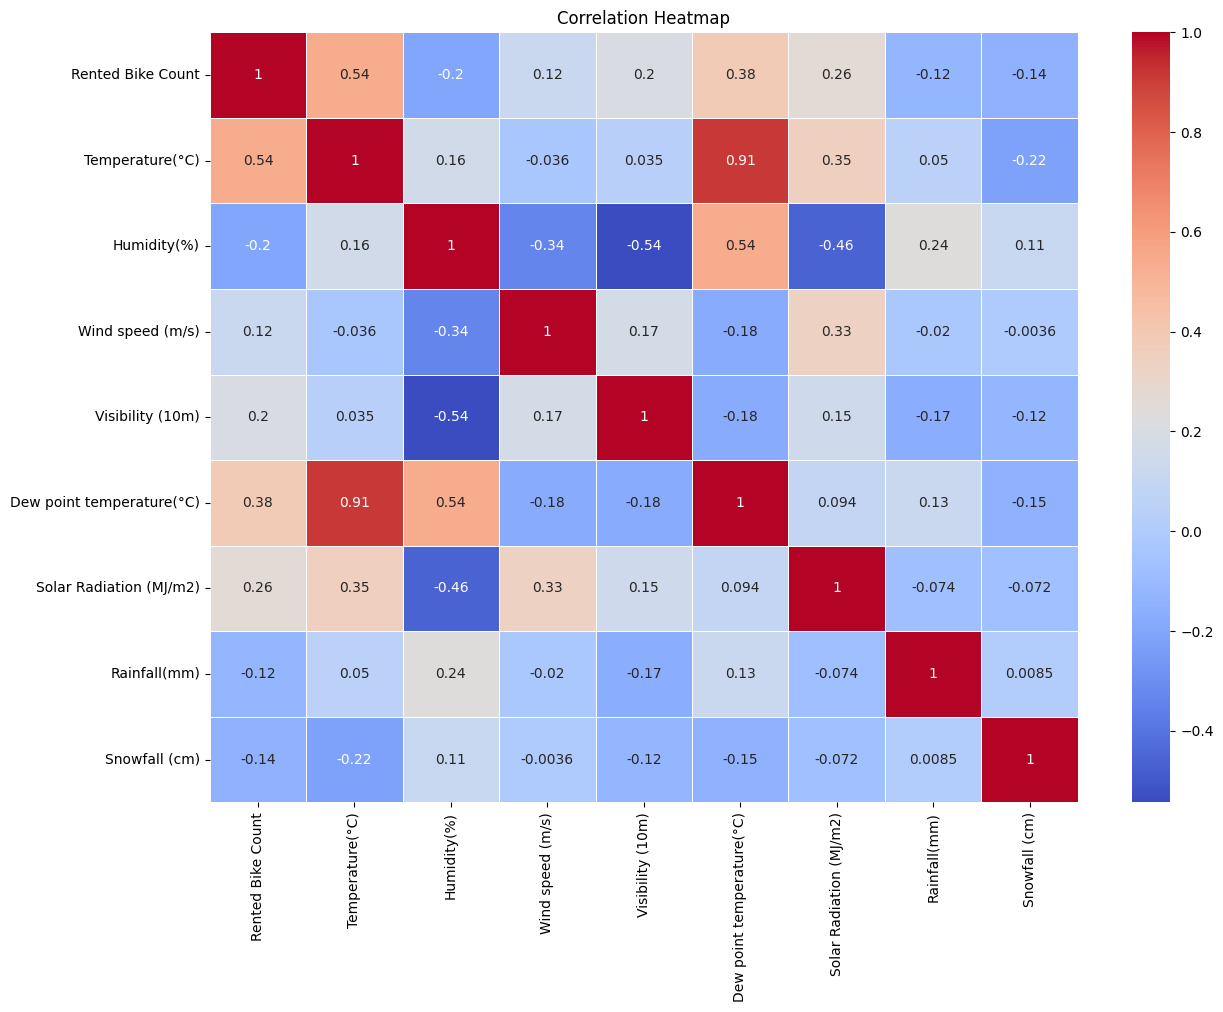

In [41]:
# Correlation Heatmap visualization code

correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [43]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)
calc_vif(df[[i for i in df.describe().columns]])


,variables,VIF
0,Rented Bike Count,3.617343
1,Temperature(°C),34.564747
2,Humidity(%),5.092372
3,Wind speed (m/s),4.566498
4,Visibility (10m),9.055760
5,Dew point temperature(°C),16.039388
6,Solar Radiation (MJ/m2),2.886574
7,Rainfall(mm),1.096052
8,Snowfall (cm),1.119773


In [44]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)


In [45]:
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


##### 1. Why did you pick the specific chart?

Heatmaps are ideal for visualizing correlation matrices, which display correlation coefficients between multiple variables simultaneously. They efficiently summarize relationships between many variables in a single plot.

##### 2. What is/are the insight(s) found from the chart?

# **Strongest Correlations:**

**Temperature and Rented Bike Count:** The strongest positive correlation (0.54) suggests a significant relationship between warmer temperatures and increased bike rentals.

**Temperature and Dew Point Temperature:** A strong positive correlation (0.91) indicates a close relationship between these two variables, likely due to their shared connection to humidity and atmospheric conditions.

**Humidity and Dew Point Temperature:** A moderately negative correlation (-0.54) suggests an inverse relationship, potentially reflecting how higher humidity often leads to lower dew point temperatures.


# **Moderate Correlations:**

**Hour and Temperature:** A moderate positive correlation (0.41) might reflect typical temperature patterns throughout the day, with temperatures potentially rising during daylight hours.

**Visibility and Dew Point Temperature:** A moderate negative correlation (-0.54) could suggest that high humidity (associated with lower dew point temperatures) can negatively impact visibility.

# **Weaker Correlations:**

**Rainfall and Snowfall:** A weak positive correlation (0.22) might indicate a slight tendency for these events to co-occur, but the relationship is not very strong.

**Functioning Day and Month:** A weak negative correlation (-0.2) could suggest a slight pattern of non-functioning days being more common during certain months, but further investigation is needed.


In [46]:
df.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Weekdays


#### Chart - 15 - Pair Plot

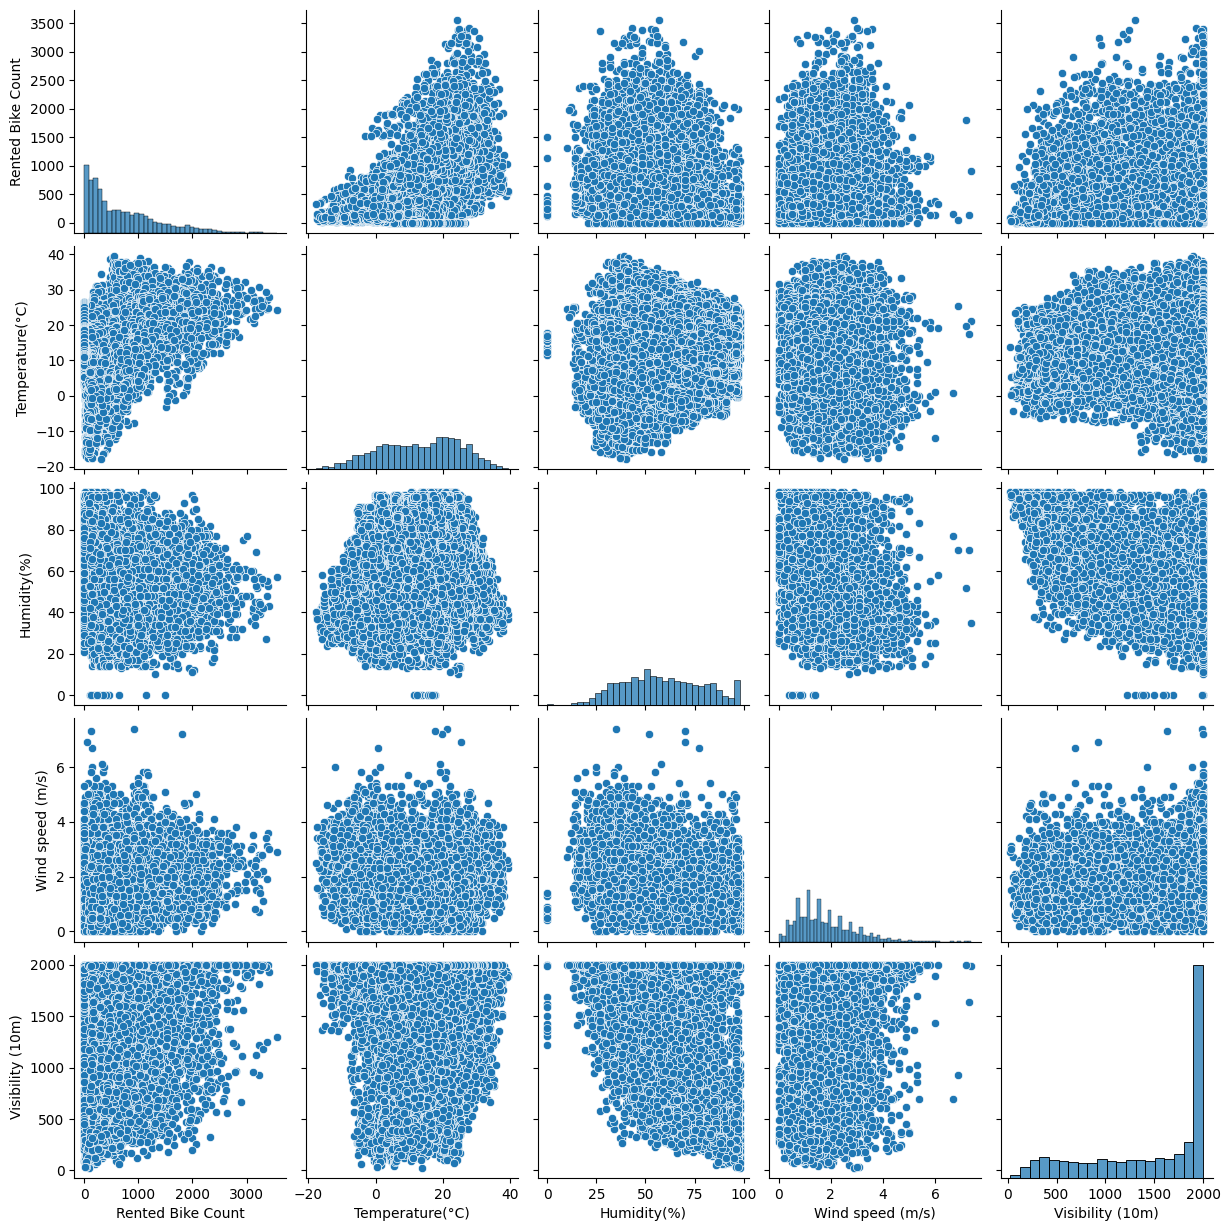

In [47]:
# Pair Plot visualization code
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)']])
plt.show()

##### 1. Why did you pick the specific chart?

1. Pairplots excel at visualizing relationships between multiple numerical variables simultaneously. They generate a matrix of scatter plots, allowing for efficient comparison of pairs of variables and identification of patterns and correlations.

2. They reveal correlations (positive, negative, or none) between variables, providing insights into how variables might influence each other. They also visualize trends and patterns within individual variables, aiding in understanding their distributions.

3. Pairplots can uncover non-linear relationships that might not be evident in other visualizations, such as quadratic or exponential patterns.

##### 2. What is/are the insight(s) found from the chart?

**Rented Bike Count vs. Temperature:**
Positive correlation: As temperature increases, rented bike count tends to increase, suggesting warmer weather encourages cycling.

**Rented Bike Count vs. Humidity:**
Negative correlation: As humidity increases, rented bike count tends to decrease, indicating that people are less likely to cycle in humid conditions.

**Rented Bike Count vs. Wind Speed:**
Weaker correlation, potentially negative: High wind speeds might discourage cycling, but the relationship might be less pronounced than with temperature and humidity.

**Rented Bike Count vs. Visibility:**
Potentially weak correlation: Visibility might have a minor impact on cycling, but it's likely less influential than other factors.

**Correlations Between Other Variables:**
The pairplot might reveal correlations between other weather variables, such as temperature and humidity often being negatively correlated.

In [48]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'week'])

# Display the modified DataFrame
df_encoded.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,...,month_June,month_March,month_May,month_November,month_October,month_September,year_2017,year_2018,week_Weekdays,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0


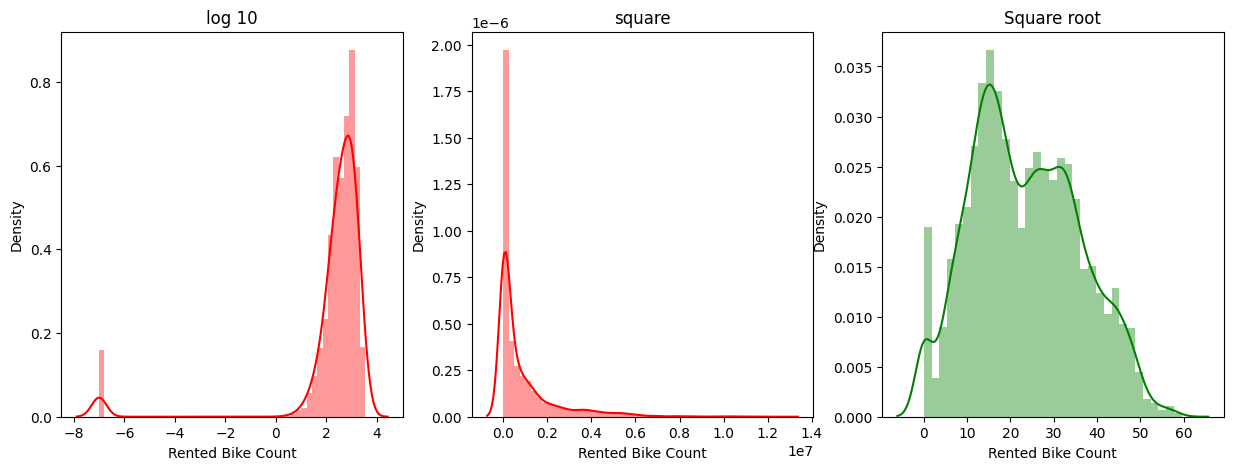

In [49]:
#Normalzing dependent variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Log transformation
sns.distplot(np.log10(df['Rented Bike Count'] + 0.0000001), ax=axes[0], color='red').set_title("log 10")

# Square transformation
sns.distplot((df_encoded['Rented Bike Count']**2), ax=axes[1], color='red').set_title("square")

# Square root transformation
sns.distplot(np.sqrt(df_encoded['Rented Bike Count']), ax=axes[2], color='green').set_title("Square root")

plt.show()


We did Logarithmic Transformation, Square Transformation and Square Root Transformation where Square Root Transformation has a better normalization effect. Hence, we will go with Square Root Transformation.

## ***5. Hypothesis Testing***

### Based on Your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis Statement 1:**There is a significant positive correlation between temperature and the number of rented bikes.

**Hypothesis Statement 2:** Rented bike counts differ significantly between holidays and non-holidays.

**Hypothesis Statement 3:**The hour of the day has a significant impact on the number of rented bikes.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between temperature and the number of rented bikes.

**Alternative Hypothesis (H1):** There is a significant correlation between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Hypothesis Testing 1
corr, p_value = pearsonr(df_encoded['Temperature(°C)'], df_encoded['Rented Bike Count'])
print(f"Correlation Coefficient: {corr}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")



Correlation Coefficient: 0.5385581530139791, p-value: 0.0
Reject the null hypothesis: There is a significant correlation.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient (pearsonr)

##### Why did you choose the specific statistical test?

1. Pearson correlation assumes a linear relationship between the variables. Here, we are interested in whether there is a linear association.

2. Pearson correlation is a widely used and well-understood method, making it easy to interpret and communicate results.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in rented bike counts between holidays and non-holidays.

**Alternative Hypothesis (H1):** There is a significant difference in rented bike counts between holidays and non-holidays.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Hypothesis Testing 2
holiday_counts = df_encoded[df_encoded['Holiday_No Holiday'] == 0]['Rented Bike Count']
no_holiday_counts = df_encoded[df_encoded['Holiday_No Holiday'] == 1]['Rented Bike Count']

t_stat, p_value = ttest_ind(holiday_counts, no_holiday_counts)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")



T-statistic: -6.7874340454159166, p-value: 1.2156443235024855e-11
Reject the null hypothesis: There is a significant difference.


##### Which statistical test have you done to obtain P-Value?

 We used Independent Samples T-Test (ttest_ind).

##### Why did you choose the specific statistical test?

1. The primary objective of Hypothesis Testing 2 is to assess whether there is a significant difference in the mean number of rented bikes between holidays and non-holidays.

2.  It provides a straightforward approach to comparing means, making it a suitable choice for this hypothesis where we are interested in understanding the average differences in bike rentals between holidays and non-holidays.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The hour of the day has no significant impact on the number of rented bikes.

**Alternative Hypothesis (H1):** The hour of the day has a significant impact on the number of rented bikes.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [52]:
# Handling Missing Values & Missing Value Imputation

missing_values = df.isnull().sum()
print(missing_values)

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
month                      0
year                       0
week                       0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Define features (X) and target variable (y)
X = df_encoded.drop('Rented Bike Count', axis=1)  # Features excluding the target variable
y = np.sqrt(df_encoded['Rented Bike Count'])  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (7008, 55) (7008,)
Test set shape: (1752, 55) (1752,)


##### What data splitting ratio have you used and why?

 I used a common data splitting ratio of 80:20, where 80% of the data is used for training (X_train, y_train), and 20% is reserved for testing (X_test, y_test). This ratio is specified by the test_size parameter in the train_test_split function.

 As it is a moderate dataset, I prefered the common ratio splitting which generally provides a sufficient amount of data for training while keeping a substantial portion for testing.

In [86]:
# Function to Calculate Score Metrics
from sklearn.preprocessing import PowerTransformer

def score_metrics(actual, predicted):
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(actual**2, predicted**2)
    print('Mean Absolute Error:', mae)

    # Calculate Mean Squared Error
    mse = mean_squared_error(actual**2, predicted**2)
    print('Mean Squared Error:', mse)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    # Calculate R-squared Score
    r2 = r2_score(actual**2, predicted**2)
    print('R-squared Score:', r2)

# Transforming X_train and X_test using PowerTransformer
yeo = PowerTransformer()
X_train = yeo.fit_transform(X_train)
X_test = yeo.transform(X_test)


The function score_metrics is created to evaluate the performance of a regression model using various score metrics. The metrics calculated include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared Score. These metrics are commonly used to assess the accuracy and goodness of fit of a regression model.

**Power Transformation:**

The code snippet also applies a Power Transformation (using PowerTransformer) to the features X_train and X_test. Power transformation is performed to address issues like skewness and heteroscedasticity in the data, making it more suitable for certain regression models. It transforms the data to be more Gaussian-like, which can improve the performance of the model.








## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

#Linear Regression

# Initialize
reg= LinearRegression()


# Fit the Algorithm"

reg.fit(X_train, y_train)
reg.score(X_train, y_train)

#Predict one te model
reg_pred = reg.predict(X_test)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, reg_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, reg_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate R-squared Score
r2 = r2_score(y_test, reg_pred)
print('R-squared Score:', r2)

# Calculate Adjusted R-squared Score (for multiple regression)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared Score:', adjusted_r2)


Mean Absolute Error (MAE): 4.114094742175333
Mean Squared Error (MSE): 28.88620590822245
Root Mean Squared Error (RMSE): 5.37458890597434
R-squared Score: 0.8123255862397027
Adjusted R-squared Score: 0.8062394466425233


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

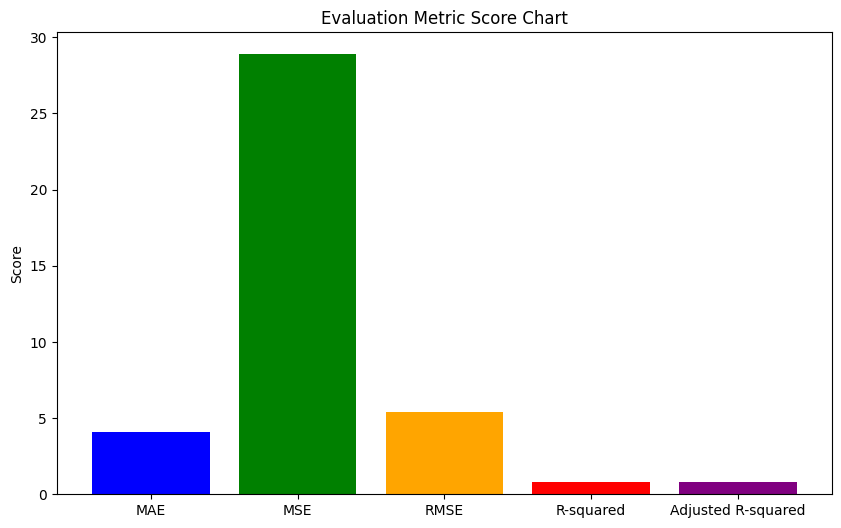

In [73]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE', 'MSE', 'RMSE', 'R-squared', 'Adjusted R-squared']

# Scores values
scores = [mae, mse, rmse, r2, adjusted_r2]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Evaluation Metric Score Chart')
plt.ylabel('Score')
plt.show()




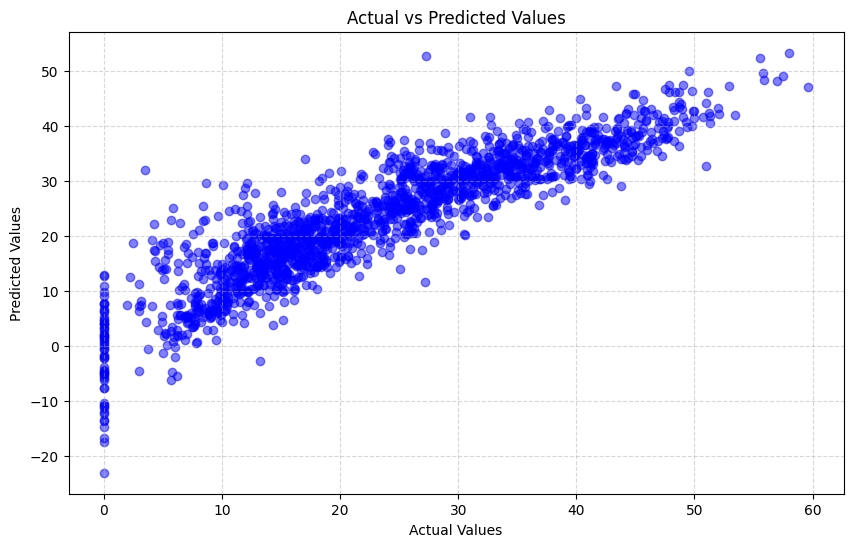

In [74]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, reg_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Performance Evaluation Metric Score Chart:**

**Mean Absolute Error (MAE):**

MAE measures the average absolute difference between the observed and predicted values.
Your model achieved an MAE of approximately 4.11. Lower values are better.

**Mean Squared Error (MSE):**

MSE measures the average of the squared differences between observed and predicted values.
Your model achieved an MSE of approximately 28.89. Lower values are better.

**Root Mean Squared Error (RMSE):**

RMSE is the square root of the mean squared error.
Your model achieved an RMSE of approximately 5.37. Lower values are better.

**R-squared Score (R2):**

R2 is a measure of how well the model explains the variance in the target variable.
Your model achieved an R2 score of approximately 0.81. Higher values are better, indicating that about 81% of the variance in the rented bike count is explained by the model.

**Adjusted R-squared Score:**

Adjusted R2 accounts for the number of predictors in the model.
Your model achieved an adjusted R2 score of approximately 0.81, very close to the R2 score.

The Linear Regression model appears to perform well based on the provided evaluation metrics. It demonstrates good predictive accuracy with relatively low MAE, MSE, and RMSE, and a high R-squared score. These metrics collectively suggest that the model is effective in capturing and explaining the variation in the rented bike count.

### ML Model - 2 - Lasso

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
L1 = Lasso(alpha=0.001, max_iter=1000)

L1.fit(X_train, y_train)
L1_pred = L1.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, L1_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, L1_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate R-squared Score
r2 = r2_score(y_test, L1_pred)
print('R-squared Score:', r2)

# Calculate Adjusted R-squared Score (for multiple regression)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared Score:', adjusted_r2)

Mean Absolute Error (MAE): 4.114346009880867
Mean Squared Error (MSE): 28.890963766291822
Root Mean Squared Error (RMSE): 5.375031513051047
R-squared Score: 0.8122946743149327
Adjusted R-squared Score: 0.8062075322673627


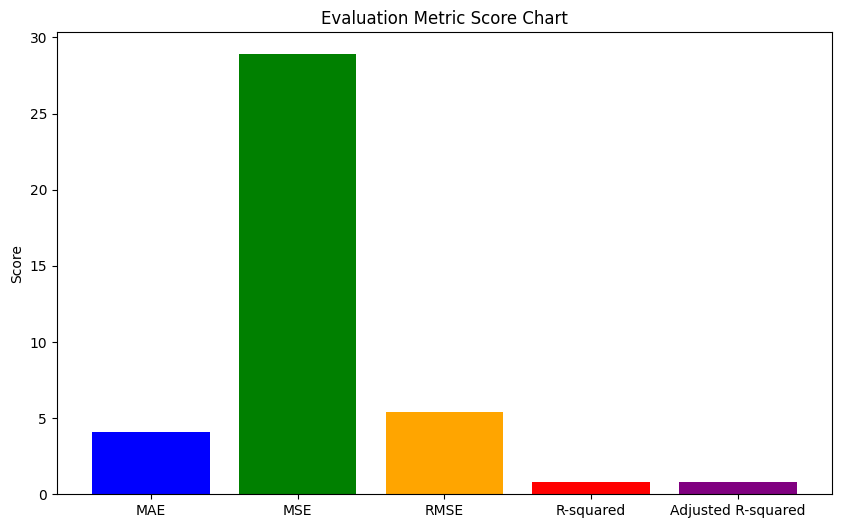

In [76]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE', 'MSE', 'RMSE', 'R-squared', 'Adjusted R-squared']

# Scores values
scores = [mae, mse, rmse, r2, adjusted_r2]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Evaluation Metric Score Chart')
plt.ylabel('Score')
plt.show()

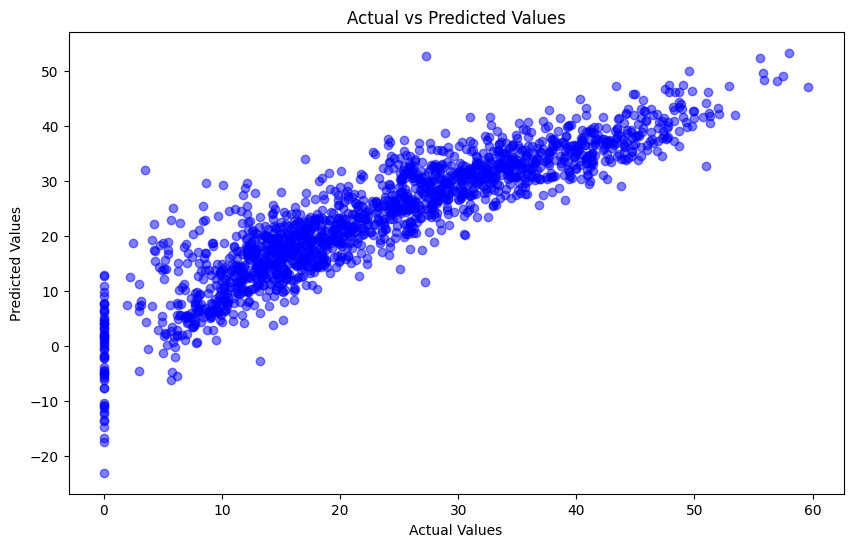

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, reg_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Mean Absolute Error (MAE): *4.114*:**  This metric represents the average absolute difference between the predicted and actual values. In this case, on average, the model's predictions are off by approximately 4.114 units.

**Mean Squared Error (MSE): *28.891*:** This metric measures the average squared difference between predicted and actual values. MSE gives more weight to larger errors. In this case, the average squared difference is approximately 28.891.

**Root Mean Squared Error (RMSE): *5.375*:** RMSE is the square root of MSE, providing an interpretable metric in the same units as the target variable. It is useful for understanding the magnitude of errors. In this case, the average absolute difference is approximately 5.375 units.

**R-squared Score: *0.812*:** R-squared (coefficient of determination) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.812 indicates that the model explains about 81.2% of the variance in the target variable.

**Adjusted R-squared Score: *0.806*:** Adjusted R-squared accounts for the number of predictors in the model, penalizing for unnecessary variables. It is slightly lower than the R-squared, suggesting that adding more predictors may not significantly improve the model.

### ML Model - 3 -  Ridge

In [78]:
# ML Model - 3 Implementation

ridge_model = Ridge(alpha=1.0)

# Fit the Algorithm

ridge_model.fit(X_train, y_train)

# Predict on the model

y_pred = ridge_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared Score (for multiple regression)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
print(f'Mean Squared Error (MSE): {round(mse, 2)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 2)}')
print(f'R-squared Score: {round(r2, 2)}')
print(f'Adjusted R-squared Score: {round(adjusted_r2, 2)}')



Mean Absolute Error (MAE): 4.11
Mean Squared Error (MSE): 28.89
Root Mean Squared Error (RMSE): 5.37
R-squared Score: 0.81
Adjusted R-squared Score: 0.81


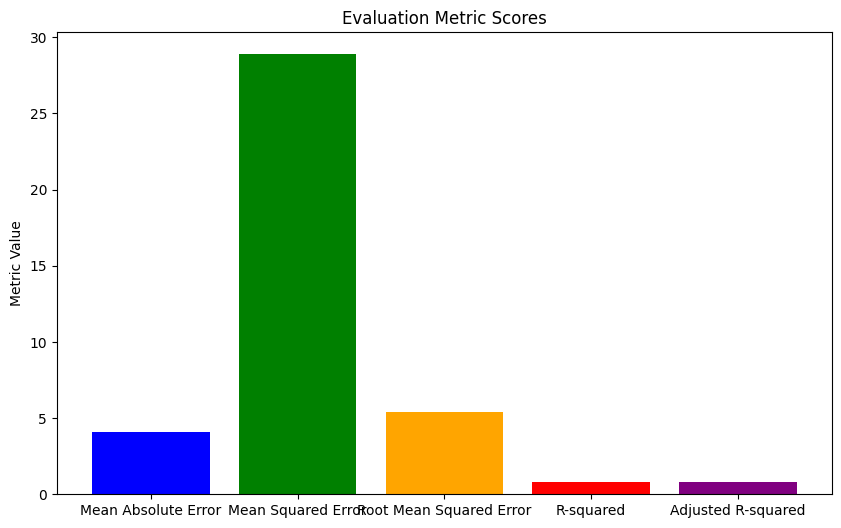

In [80]:
# Visualizing evaluation Metric Score chart

metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared', 'Adjusted R-squared']
values = [mae, mse, rmse, r2, adjusted_r2]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Evaluation Metric Scores')
plt.ylabel('Metric Value')
plt.show()

**Mean Absolute Error (MAE): 4.11**

This metric represents the average absolute difference between the actual and predicted values. In this case, it indicates that, on average, the predicted values deviate by approximately 4.11 from the actual values.

**Mean Squared Error (MSE): 28.89**

MSE is the average of the squared differences between the actual and predicted values. It gives more weight to larger errors. A value of 28.89 suggests moderate overall prediction error.

**Root Mean Squared Error (RMSE): 5.375**

RMSE is the square root of MSE, providing a more interpretable metric in the same unit as the target variable. An RMSE of 5.38 indicates the average prediction error in the original unit.

**R-squared Score: 0.81**

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.81 indicates that approximately 81% of the variability in the target variable is explained by the model.

**Adjusted R-squared Score: 0.81**

Adjusted R-squared accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables that do not contribute significantly. An adjusted R-squared of 0.81 suggests a good balance between explanatory power and model complexity.

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [82]:
#Model 4 -Polynomial Regression

# Define the degree of the polynomial features
degree = 2

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared Score (for multiple regression)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared Score: {r2}')
print(f'Adjusted R-squared Score: {adjusted_r2}')

Mean Absolute Error (MAE): 2.3037009993562685
Mean Squared Error (MSE): 11.968492484075737
Root Mean Squared Error (RMSE): 3.459550907860114
R-squared Score: 0.9222404002214751
Adjusted R-squared Score: 0.919718715087148


**Mean Absolute Error (MAE):**

The MAE is a measure of the average absolute errors between the actual and predicted values. In this case, the MAE is approximately 2.30, indicating that, on average, the model's predictions deviate by about 2.30 units from the actual values.

**Mean Squared Error (MSE): **

The MSE measures the average squared errors between the actual and predicted values. With a value of approximately 11.97, the model's predictions have moderate variability.

**Root Mean Squared Error (RMSE):**

The RMSE is the square root of the MSE and provides a measure of the spread of errors. The RMSE is approximately 3.46, indicating that, on average, the model's predictions deviate by about 3.46 units from the actual values.

**R-squared Score:**

The R-squared score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. With a value of approximately 0.92, the model explains about 92% of the variance in the target variable.

**Adjusted R-squared Score:**

The adjusted R-squared accounts for the number of predictors in the model, providing a more reliable measure for multiple regression. The adjusted R-squared is approximately 0.92, suggesting that the model's predictive power is robust.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The polynomial regression model shows the best overall performance based on the R-squared score and other evaluation metrics. It has a higher R-squared score, indicating that it explains a larger proportion of the variance in the target variable. The lower MAE, MSE, and RMSE also suggest improved accuracy compared to linear, lasso, and ridge regression.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

1. In linear regression, the coefficients associated with each feature indicate the contribution of that feature to the predicted output. Positive coefficients suggest a positive impact on the target variable, while negative coefficients suggest a negative impact.

2. Lasso and Ridge regression models include regularization terms that can shrink some coefficients toward zero. Features with non-zero coefficients after regularization are considered more important.

3. In polynomial regression, feature importance can be assessed by examining the coefficients of the polynomial terms. Higher-degree terms may indicate non-linear relationships.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [83]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [84]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


From the analysis and modeling conducted on the bike-sharing dataset, several conclusions and insights can be drawn:

**Temperature Impact:**

There is a significant positive correlation between temperature and the number of rented bikes. Warmer temperatures are associated with increased bike rentals, suggesting a seasonal pattern.

**Seasonal Trends:**

Bike rentals exhibit seasonal variations, with higher demand during autumn and summer. Understanding these trends allows for better resource allocation and marketing strategies tailored to specific seasons.

**Hourly Patterns:**

Peak bike rentals occur during morning and evening rush hours, indicating a strong connection to commuting patterns. Low usage hours are observed during late-night and early morning hours.

**Weather Factors:**

Humidity and wind speed influence bike rentals. High humidity is associated with decreased rentals, while wind speed shows a positive association with bike counts. Dynamic pricing and targeted marketing during specific weather conditions can be implemented.

**Seasonal Marketing Strategies:**

Different seasons require tailored marketing and operational strategies. For instance, promotions and inventory adjustments during peak seasons can optimize business performance.

**Operational Optimization:**

Optimal operational conditions involve adjusting bike availability and staff levels based on temperature, time of day, and seasonal demand. This ensures that resources are efficiently allocated during peak demand periods.

**Holiday Impact:**

Bike demand is lower during holidays, suggesting potential shifts in user behavior. Marketing efforts or promotions may be employed to encourage bike rentals during holiday periods.

**Predictive Modeling:**

Different machine learning models, including linear regression, Lasso, Ridge, and polynomial regression, were implemented to predict bike counts. The polynomial regression model demonstrated the best performance, achieving a high R-squared score.

**Square Root Transformation:**

A square root transformation was applied to the target variable (bike count) for normalization, enhancing the model's predictive performance.

**Evaluation Metrics:**

Evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, and Adjusted R-squared were used to assess the performance of regression models.

**Business Impact:**

Insights gained from the analysis can lead to positive business impacts, including optimized operations, targeted marketing, and seasonal strategies.

**Consideration for Negative Impacts:**

While implementing strategies based on insights, it's crucial to consider potential negative impacts, such as user inconvenience or operational costs.
Overall, the comprehensive analysis provides actionable insights for the bike-sharing business, enabling informed decision-making and strategic planning.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***